<h2><font color='red'>Data Visualization &amp; Plotting</font></h2>
<p>Welcome to our drill.  As you know from the asynch presentation, there  are <i>many</i> tools to help you present your data in a visual medium.  Note that the realm of "visualization" is a continuum of static images, data visualizations that include enough context or metadata to help people learn more (information visualization) and further <i>interactive</i> information visualizations that let your users ask &ldquo;what if&rdquo; scenarios and to engage in a kind of conversation with their data in order to learn more ... to expose to unanticipated.   </p>
<p>In this drill we apply the same techniques discussed in the video lectures to a popular medical dataset about heart disease.  Such a dataset is especially useful because it underscores the need for us to understand the fields/columns, the influence of domain knowledge when deciding what data to explore.</p>  

<h3>A Medical Dataset</h3><p>
This drill uses a cleaned data set about heart disease in Switzerland.   This is one of the most commonly used sets in teaching visualization.  Of the many attributes in this we&rsquo;re interested only in the following:<ol>
    <li>#3 (age) [age in years]</li>
    <li>#4 (sex) [1=male; 0=female]</li>
    <li>#9 (cp) [chest pain (angina) (1=angina, 2=atypical, 3=non-anginal pain; 4=asymptomatic]</li>
    <li>#10 (trestbps) [resting blood pressure in mm Hg on hospital admission]</li>
    <li>#12 (chol) [serum cholesterol in mg/dl]</li>
    <li>#16 (fbs) [fasting blood sugar > 120 mg/dl (1=true; 0=false)]</li>
    <li>#19 (restecg) [resting electrocardiogram (0=normal; 1=having ST-T; 2=hypoertrophy)]</li>
    <li>#32 (thalach) [maximum heart rate achieved]</li>
    <li>#38 (exang) [exercise-induced angina (1=yes; 0=no)]</li>
    <li>#40 (oldpeak) [ST depression induced by exercise relative to rest]</li>
    <li>#41 (slope) [the slop of the peak exercise ST segment (1=upsloping; 2=flat; 3=downsloping]</li>
    <li>#44 (ca) [number of major vessles (0-3) colored by flourosopy]</li>
    <li>#51 (thal) [3=normal; 6=fixed defect; 7=reversable defect]</li>
    <li>#59 (num) (predicted attributed) [diagnosis of heart disease (angiographic disease status) value=0 < 50% diameter narrowing; Value 1 = >50% diameter narrowing)]</li>
</ol>
</p>
<p>The source file is <code>heartDisease-Switzerland.csv</code>.</p>

<blockquote><h2>Note</h2> Because of the quirks of some of these libraries, there is a lot of code necessarily repeated in the Notebook cells.  For these drills, please look at the <b>comments</b> in the cells to see what to do.</blockquote>

In [1]:
#--------------- 0 --------------------------
# imports
# TASK: PREPARE THE CELL BY LOADING THE APPROPRIATE LIBRARIES ... 



# TASK: USE THE % COMMAND TO CAUSE THE OUTPUT TO APPEAR IN THE NOTEBOOK
%

# -------------- 1---------------------------
#TASK:  LOAD THE DATA INTO A DATA FRAME.
#       THE FILE TO READ IS 'heartDisease-Switzerland.csv'


# provide column names
# TASK: NOTE THAT THE ORIGINAL DATA SOURCE LACKS COLUMN NAMES.
# JUST AS AN FYI WE CAN ASSIGN THEM HERE ... 
df.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

# TASK: DISPLAY THE HEAD TO MAKE SURE THE COMMAND TOOK ... 

# ---------------- 2 ------------------------
#do a little data-cleansing of our own ... replace every number 
# greater than 0 to 1 to mark heart disease
df.loc[df['num'] > 0, 'num'] = 1
df.ca = pd.to_numeric(df.ca, errors='coerce').fillna(0)
df.thal = pd.to_numeric(df.thal, errors='coerce').fillna(0)
# TASK:  THE ABOVE IS ONLY TO SUGGEST ONE OF MANY TECHNIQUES USED
# AFTER REVIEWING THE DATA TO CLEAN IT UP ...  APPLY A COMMAND 
# TO CHECK OUT THE TYPES OF THE VARIOUS NOW-NAMED COLUMNS...


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object


In [2]:
# TASK:  OUTPUT THE LAST 10 RECS ... 
print('------ Last 10  ----------')


------ Last 10  ----------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
117,70,1,4,115,0,0,1,92,1,0.0,2,1,7,1
118,70,1,4,140,0,1,0,157,1,2.0,2,1,7,1
119,72,1,3,160,0,1,2,114,0,1.6,2,2,1,0
120,73,0,3,160,0,0,1,121,0,0.0,1,1,3,1
121,74,1,2,145,0,1,1,123,0,1.3,1,1,1,1


In [43]:
# TASK: DISPLAY THE HEAD OF THE DATA ...

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,34,1,4,115,0,1,1,154,0,0.2,1,1,1,1
1,35,1,4,1,0,1,0,130,1,1.0,1,1,7,1
2,36,1,4,110,0,1,0,125,1,1.0,2,1,6,1
3,38,0,4,105,0,1,0,166,0,2.8,1,1,1,1
4,38,0,4,110,0,0,0,156,0,0.0,2,1,3,1


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


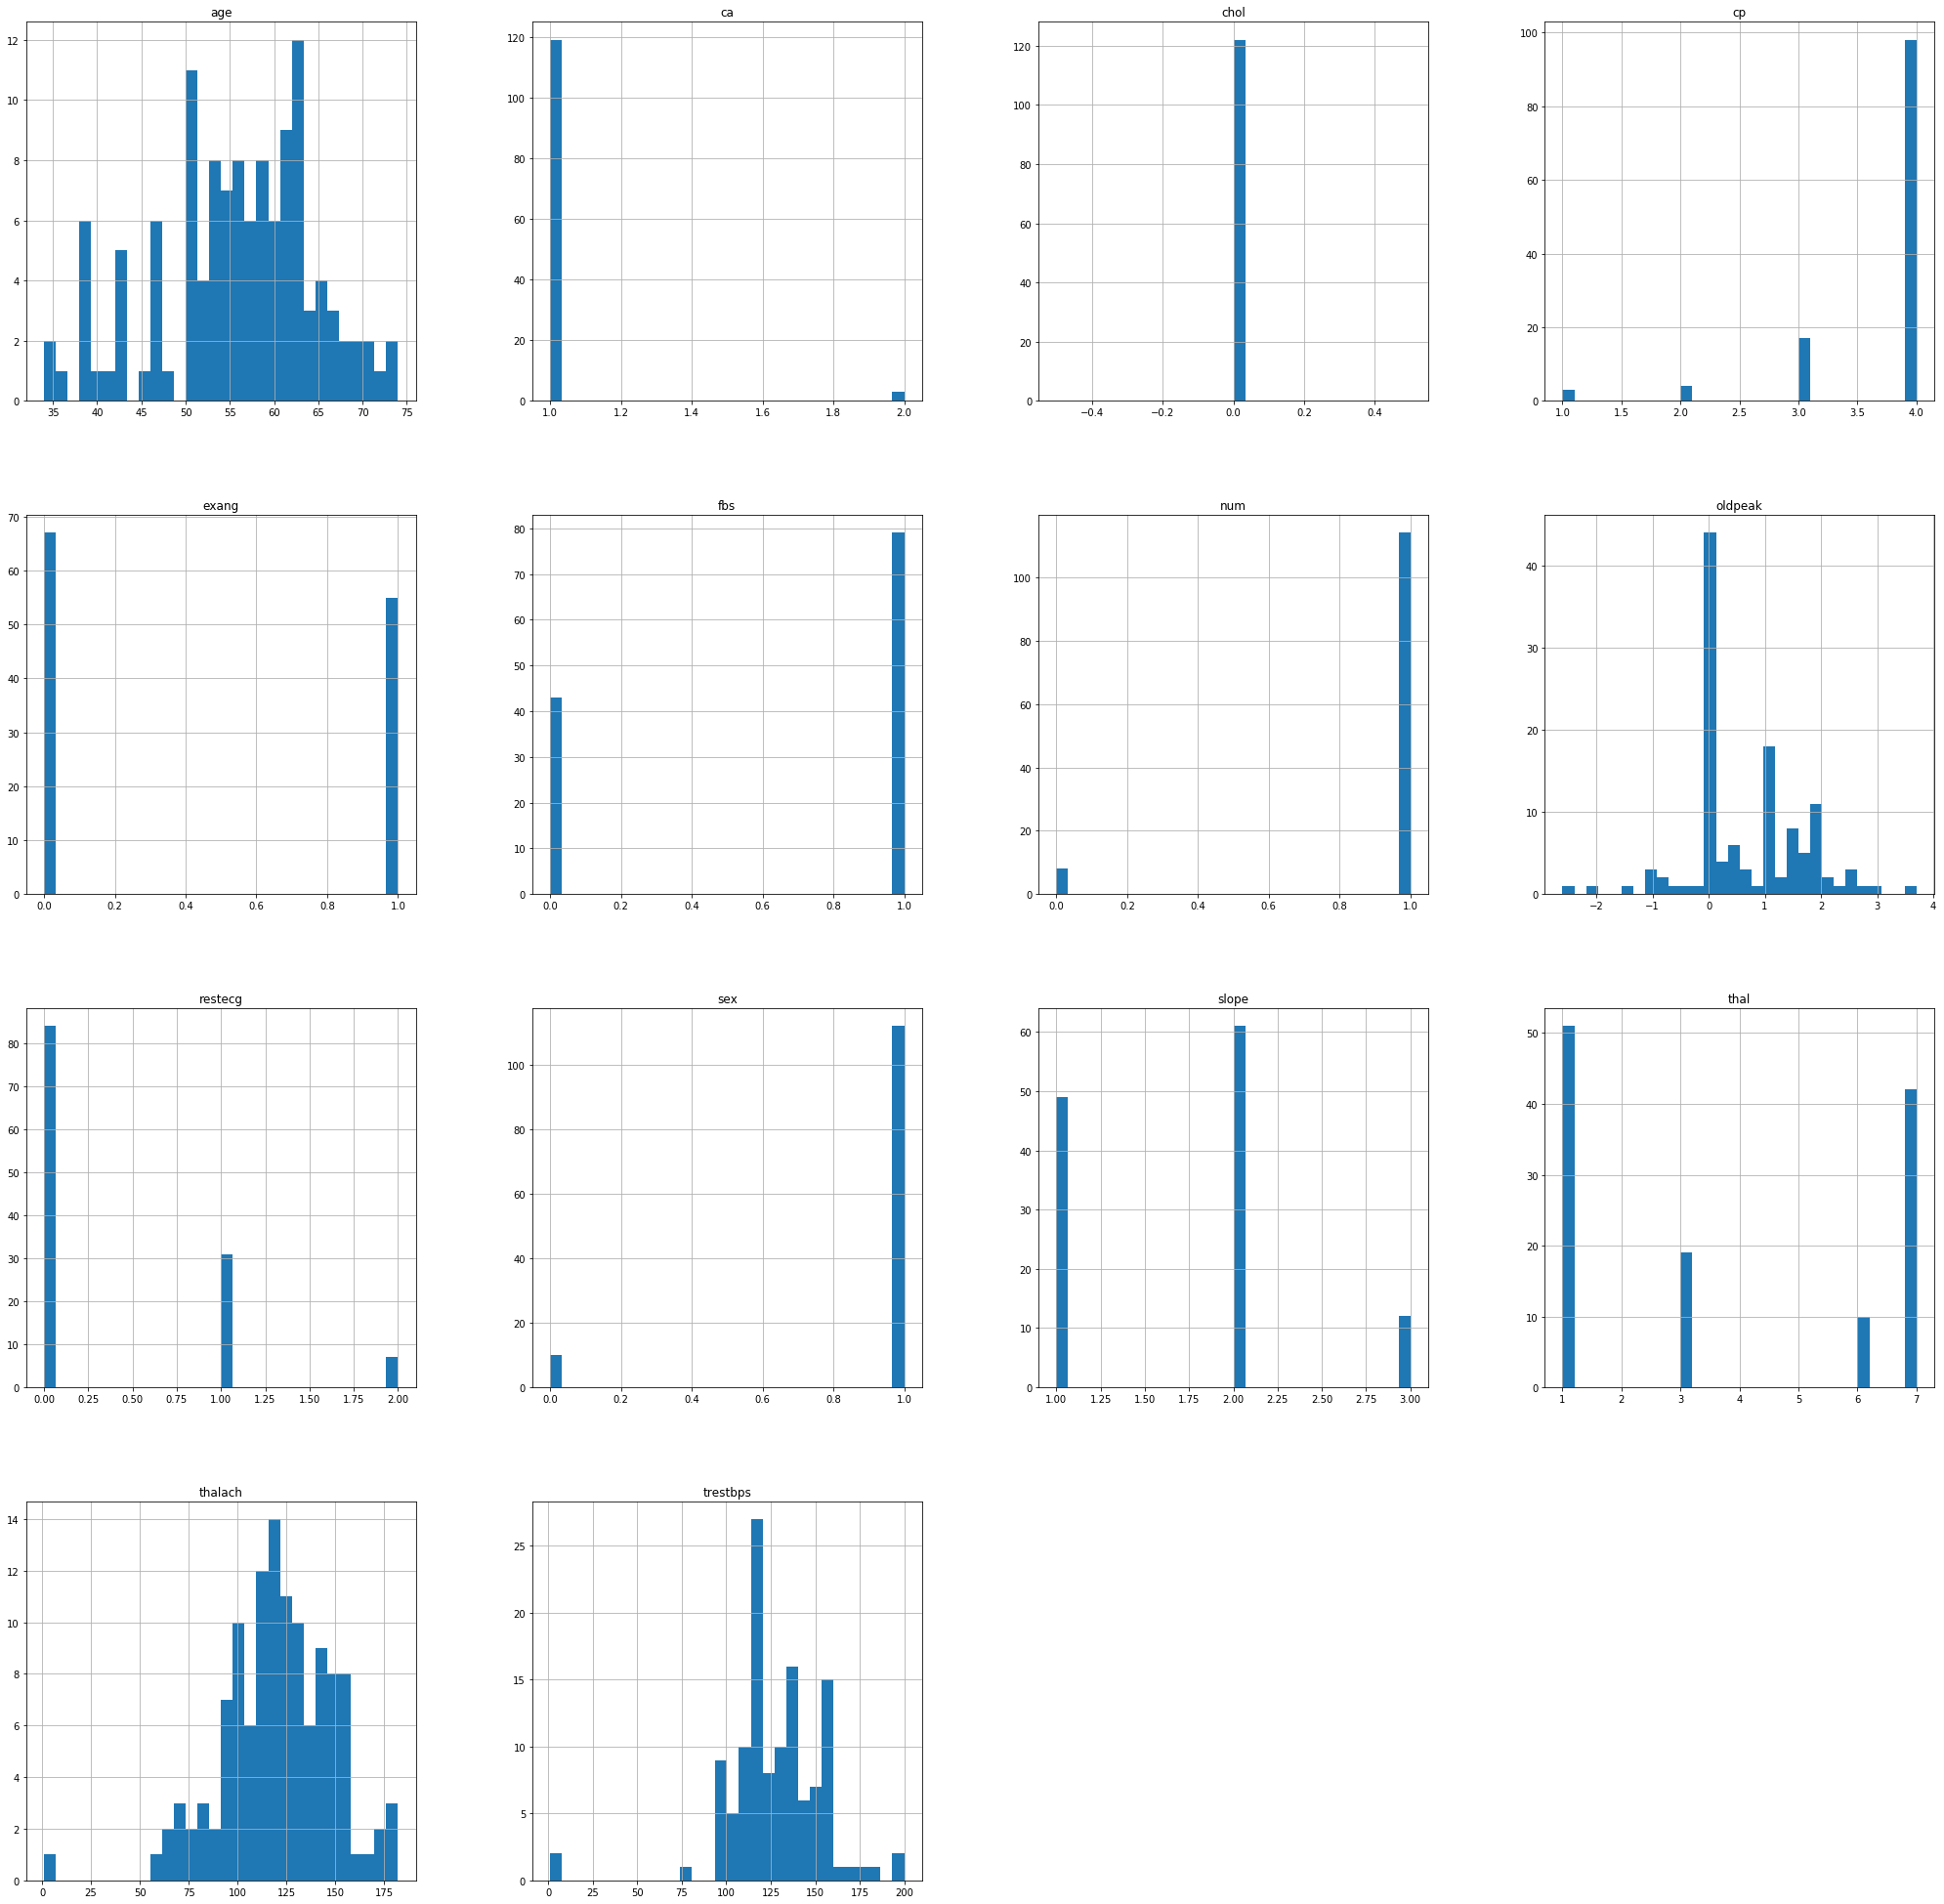

In [3]:
# let's get a historgram:
# TASK:  LET'S CHANGE THE SIZE OF THE OUTPUT AREA (E.G., 35, 35)
# HINT, fig = plt ... 


df.hist(ax = ax, bins = 30)
plt.show()

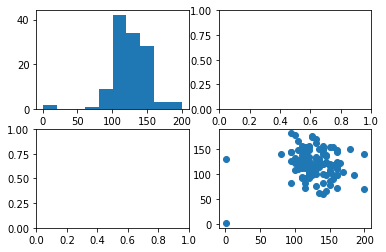

<Figure size 7200x7200 with 0 Axes>

In [77]:
# TASK:  Here we want to try applying the "shortcuts" of creating
# fig and ax ... let's create one using plt and subplots(2,2)
# then think about ax[0][0] and ax[1][1]....
# make the ax[0][0] refer to a histograph for the "trestbps" field
# make the ax[1][1] refer to a scatterplot of trestbps and thalch

fig, ax = plt.subplots(2, 2)
fig = plt.figure(figsize = (35,35)) # try other values, like 18, 10, 100... 
# your additions here...

<h3>line up the charts ... </h3> using sharex = True and add some space between the outputted graphs.

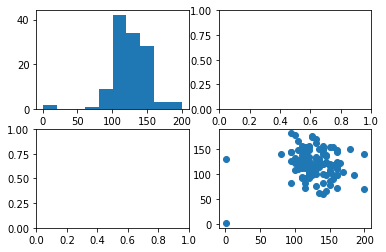

<Figure size 2520x2520 with 0 Axes>

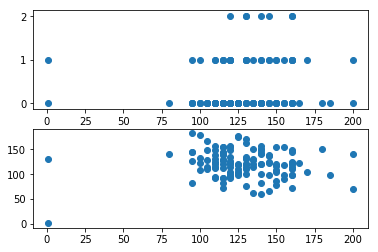

In [4]:
# TASK: THIS CELL NEEDS TO HAVE EVERYTHING FROM THE STARTING IMPORT 
# STATEMENTS THRU THE INLINE, LOADING THE DATA FROM THE CSV FILE ...
# AND THE SHORTCUTS, AX[0],AX[1] AND SO ON ... SO YOU CAN NOW FOCUS
# ON EXPANDING THE SIZE OF THE CHARTS ON THE X AND Y ... 












# if you have multiple  sharex and sharey
# say we’re comparing 2 things (resting heart rate) + ecg / max heart rate achieved during testing
rows = 2
cols = 1
fig, ax = plt.subplots(rows, cols)
ax[0].scatter(df.trestbps, df.restecg)  #x , y
ax[1].scatter(df.trestbps, df.thalach)  #x , y axis


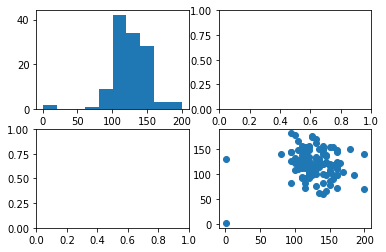

<Figure size 2520x2520 with 0 Axes>

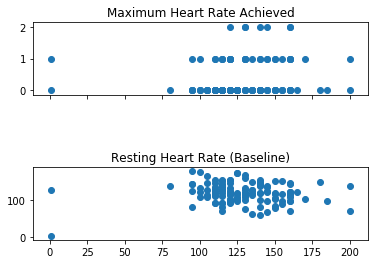

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#load the data from a .csv file
df = pd.read_csv("heartDisease-Switzerland.csv")

# provide column names
df.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

# shortcut:
fig, ax = plt.subplots(2, 2)# rows and columns
fig = plt.figure(figsize = (35,35))
fig.subplots_adjust(hspace = 1)
rows = 2
cols = 1
# ax is a 2 x 2 
ax[0][0].hist(df.trestbps)
ax[1][1].scatter(df.trestbps, df.thalach)  # experiment with placements

# if you have multiple  sharex and sharey
# say we’re comparing 2 things (resting heart rate) + ecg / max heart rate achieved during testing
rows = 2
cols = 1
# TASK: AS ABOVE USE THE SHORTCUT fig, ax... 
#  AND SET THE X AXIS WIDTH TO BE EQUAL


# ADD SOME HORIZONTAL SPACE BETWEEN THE PLOTS ... 

# LET'S MAKE SENSE OF THE TITLE ... 
# RENAME THE TITLE TO 'Maximum Heart Rate Achieved' for 0
# and 'Resting Heart Rate (Baseline) for 1


# TASK NOW ASSIGN trestbps and restecg to the x,y of a 
# scatter in ax[0]
# and trestbps and thalach in ax[1]




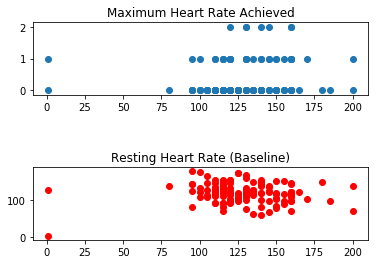

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#load the data from a .csv file
df = pd.read_csv("heartDisease-Switzerland.csv")

# provide column names
df.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

# shortcut:

# if you have multiple  sharex and sharey
# say we’re comparing 2 things (resting heart rate) + ecg / max heart rate achieved during testing
rows = 2
cols = 1
fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace = 1)

ax[0].set_title('Maximum Heart Rate Achieved')
ax[1].set_title('Resting Heart Rate (Baseline)')
ax[0].scatter(df.trestbps, df.restecg)  #x , y
# here let's combine 2 columns/field and set the color to something red... 

# TASK:  REPEAT ALL OF THE ABOVE ... BUT IN A SINGLE LINE ...
# AND, BTW, ADD SOME COLOR!  try NAMES AS WELL AS HEX TRIPLETS AND SEE!




<hr />
<h2><font color='red'>Seaborn</font></h2>   Lots of visualizations can be created with lots o' tools.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TASK: IMPORT THE SEABORD LIBRARY AS sns

%matplotlib inline
H = pd.read_csv('heartDisease-Switzerland.csv')
H.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
H.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,34,1,4,115,0,1,1,154,0,0.2,1,1,1,1
1,35,1,4,1,0,1,0,130,1,1.0,1,1,7,3
2,36,1,4,110,0,1,0,125,1,1.0,2,1,6,1
3,38,0,4,105,0,1,0,166,0,2.8,1,1,1,2
4,38,0,4,110,0,0,0,156,0,0.0,2,1,3,1


<h3>Getting to know you ... </h3> Getting to know our data usually means measures of central tendency and checking out our outlyers ... Bar charts aren&rsquo;t always applicable for this task but for the fun of it, let&rsquo;s make some bar charts!  
<p>We have important data to explore about people's health. We believe cholesterol, resting blood pressure, and maximum achieved heart rate (during a stress test) may suggest myocardial infarction.  Let's check out our data in those fields.

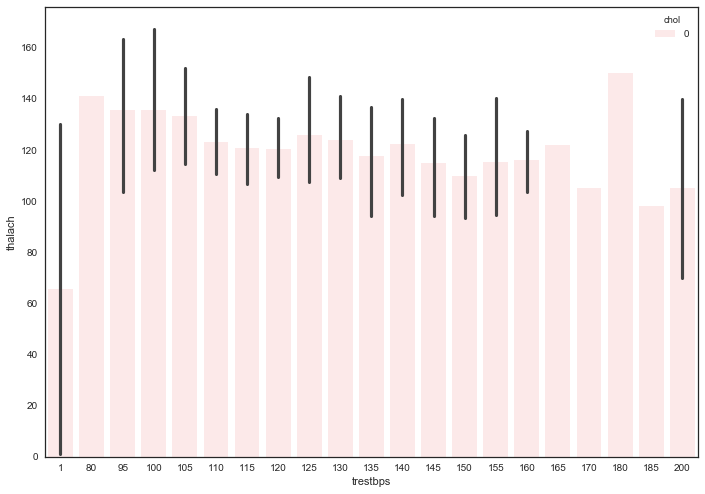

In [86]:
#TASK: WHAT'S A BIGGER SIZE?  FOR EXAMPLE, SAY WE WANT TO SAVE
# OR OUTPUT TO A 'standard' PAPER SIZE (8.5 X 11)
# THERE ARE WAYS ... BUT HERE'S A GIMME ... 
sns.set(rc={'figure.figsize':(11,8.5)})
# NOW CLEAN IT UP ... SET THE BACKGROUND COLOR TO WHITE

# NOW CONSTRUCT A BARPLOT WITH trestbps ON THE X,
# thalach ON THE Y, 
# USE cholesterol (chol) AS THE HUE
# THE DATA  ... 
# AND THE COLOR AS 'red'
# ... ALL IN A SINGLE COMMAND LINE.


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
H = pd.read_csv('heartDisease-Switzerland.csv')
H.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
H.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,34,1,4,115,0,1,1,154,0,0.2,1,1,1,1
1,35,1,4,1,0,1,0,130,1,1.0,1,1,7,3
2,36,1,4,110,0,1,0,125,1,1.0,2,1,6,1
3,38,0,4,105,0,1,0,166,0,2.8,1,1,1,2
4,38,0,4,110,0,0,0,156,0,0.0,2,1,3,1


<hr /><h4>Scatter and Regression</h4>  As described in the asynch part of today&rsquo;s presentation, let&rsquo;s use the column names and let Seaborn do the work ...
    

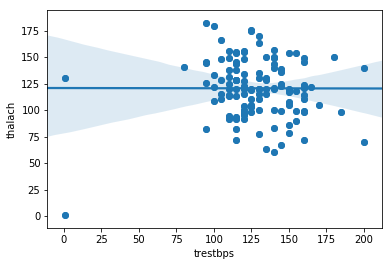

In [69]:
# following the asynch demo ... 
# AS IN THE ASYNCH ... LET'S CREATE A PLOT SCATTER AND
# A SEABORN REGRESSION IN THE SAME PLOT AREA TO SEE THE DATA
# AS WELL AS THE CONFIDENCE LEVEL ...




<h2>Heatmaps</h2> everyone loves &lsquo;em.

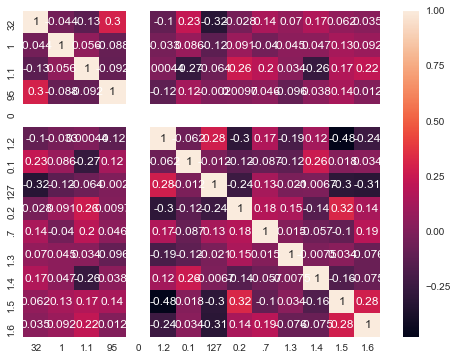

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
H = pd.read_csv('heartDisease-Switzerland.csv')
# WE'RE SET UP ABOVE  WITH THE LIBRARIES AND THE DATA ...
# NOW LET'S CREATE A CORRELATION AND STORE IT IN 'c'

# LET'S SET THE FIGURE SIZE TO 8,6 TO SEE ALL THE COOL STUFF.

# AND AS BEFORE, WE WANT TO MAKE IT PRETTY - SET THE STYLE TO WHITE

# NOW MAKE A HEATMAP AND INCLUDE THE ANNOTATIONS.


<h3>Colors ... </h3>
Colors are actually an important part of associating users' conception of the topic and the data. For instance, we think of all things hematological as being 'red'; fresh air and health with being outdoors (blue and green).  As you know from the asynch there's a lot of <a href="http://matplotlib.org/examples/color/colormaps_reference.html" target="new">colormap options</a>.  Visit this site and change the heatmap ... 


<h3>Optional</h3>  Check out <a href="https://plot.ly/~rboone125/18.embed" target="new">this plotly version</a> of these data.

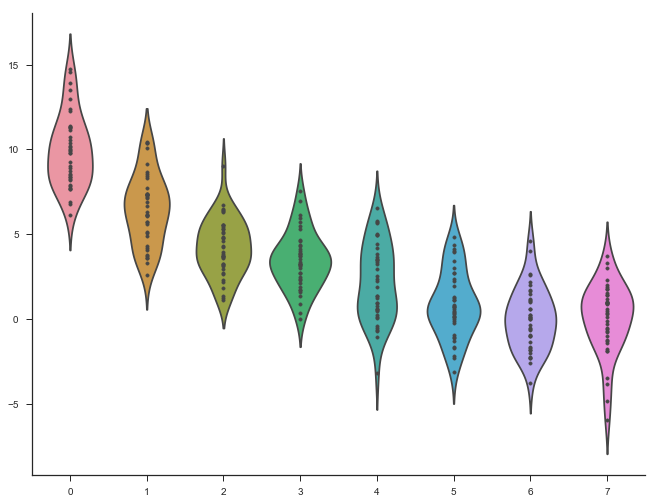

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10


# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of usual letter-sized paper, 8.5 x 11
fig.set_size_inches(11, 8.5)
sns.violinplot(data=d, inner="points", ax=ax)    
sns.despine()

fig.savefig('example.png')